# Jungnangcheon river
### We will study how precipitation, solar radiation, air preassure or Temperatures have effect on the river biochemical oxygen demand (BOD).

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [187]:
jungnangcheon_df = pd.read_excel('./readonly/Data.xlsx')
date = jungnangcheon_df['Date']
y    = jungnangcheon_df['BOD(mg/L)']
X    = jungnangcheon_df[['Temperature (°C)', 'Temperature (°C) (previous Day)', 'Precipitation (mm)', 'Precipitation (mm) (previous Day)', 'Air Pressure (hPa)', 'Air Pressure (hPa) (previous Day)', 'Solar Radiation (MJ/m2)', 'Solar Radiation (MJ/m2) (previous Day)']]
# print(jungnangcheon_df.isna().sum())
# print(jungnangcheon_df.keys())
jungnangcheon_df.describe()

,BOD(mg/L),Temperature (°C),Temperature (°C) (previous Day),Precipitation (mm),Precipitation (mm) (previous Day),Air Pressure (hPa),Air Pressure (hPa) (previous Day),Solar Radiation (MJ/m2),Solar Radiation (MJ/m2) (previous Day)
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,4.065789,15.797368,15.669737,3.822368,3.926316,1004.950000,1004.632895,16.073026,15.398816
std,2.345296,8.732468,8.712336,14.665848,12.922553,8.580295,7.840857,6.981285,7.481520
min,1.400000,-4.400000,-5.600000,0.000000,0.000000,987.300000,992.200000,2.720000,0.960000
25%,2.475000,9.125000,9.375000,0.000000,0.000000,998.325000,998.475000,11.175000,10.425000
50%,3.500000,17.100000,16.050000,0.000000,0.000000,1004.150000,1003.250000,15.865000,15.215000
75%,5.400000,23.000000,22.850000,0.000000,0.625000,1011.575000,1011.175000,21.570000,21.017500
max,12.000000,30.400000,30.200000,103.100000,86.900000,1025.300000,1021.300000,27.470000,30.060000


## Plot correlations

['Temperature (°C)', 'Temperature (°C) (previous Day)', 'Precipitation (mm)', 'Precipitation (mm) (previous Day)', 'Air Pressure (hPa)', 'Air Pressure (hPa) (previous Day)', 'Solar Radiation (MJ/m2)', 'Solar Radiation (MJ/m2) (previous Day)']


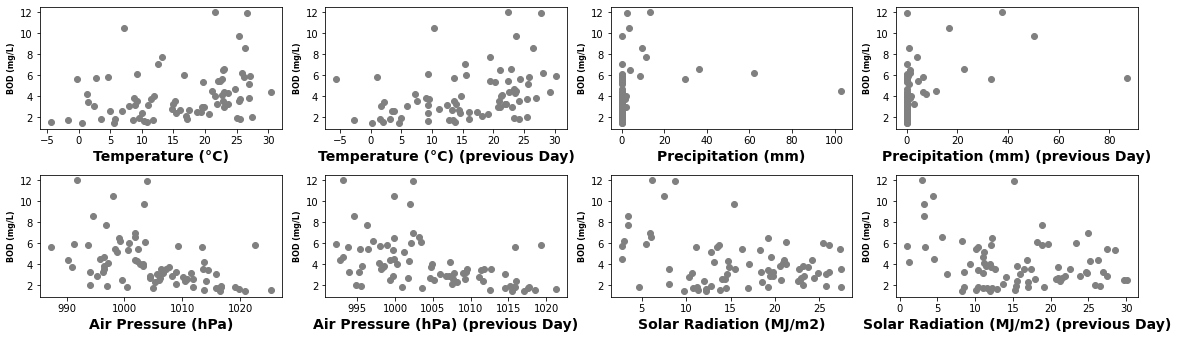

Correlation coeff (BOD and  Temperature (°C)  =  0.3
Correlation coeff (BOD and  Temperature (°C) (previous Day)  =  0.37
Correlation coeff (BOD and  Precipitation (mm)  =  0.22
Correlation coeff (BOD and  Precipitation (mm) (previous Day)  =  0.43
Correlation coeff (BOD and  Air Pressure (hPa)  =  -0.46
Correlation coeff (BOD and  Air Pressure (hPa) (previous Day)  =  -0.49
Correlation coeff (BOD and  Solar Radiation (MJ/m2)  =  -0.33
Correlation coeff (BOD and  Solar Radiation (MJ/m2) (previous Day)  =  -0.29


In [188]:

feature_name = list(X.keys())
print(feature_name)

fig = plt.figure(figsize=(16,9))
for i in range(0, len(feature_name)):
    ax = fig.add_subplot(4, 4, i+1)
    plt.scatter(jungnangcheon_df[feature_name[i]], jungnangcheon_df['BOD(mg/L)'], color='grey')
    plt.xlabel(feature_name[i], size=14, weight='bold')
    plt.ylabel('BOD (mg/L)', size=8, weight='bold')
    plt.tight_layout()
plt.show()
for feature in feature_name:
    print('Correlation coeff (BOD and ', feature, ' = ', np.corrcoef(jungnangcheon_df[feature], jungnangcheon_df['BOD(mg/L)'])[1][0].round(2))


#### As we can see here, input variables are not strongly correlated with BOD, only Air preassure has a weak correlation.

## Linear Regression model
#### This will be our first and simplest model

Accuracy_1: 48.5424%.
Accuracy_2: 43.8263%.
Accuracy_3: 56.0375%.
Accuracy_4: 62.8121%.


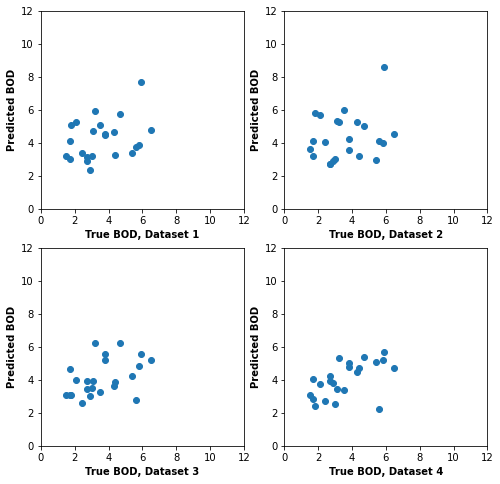

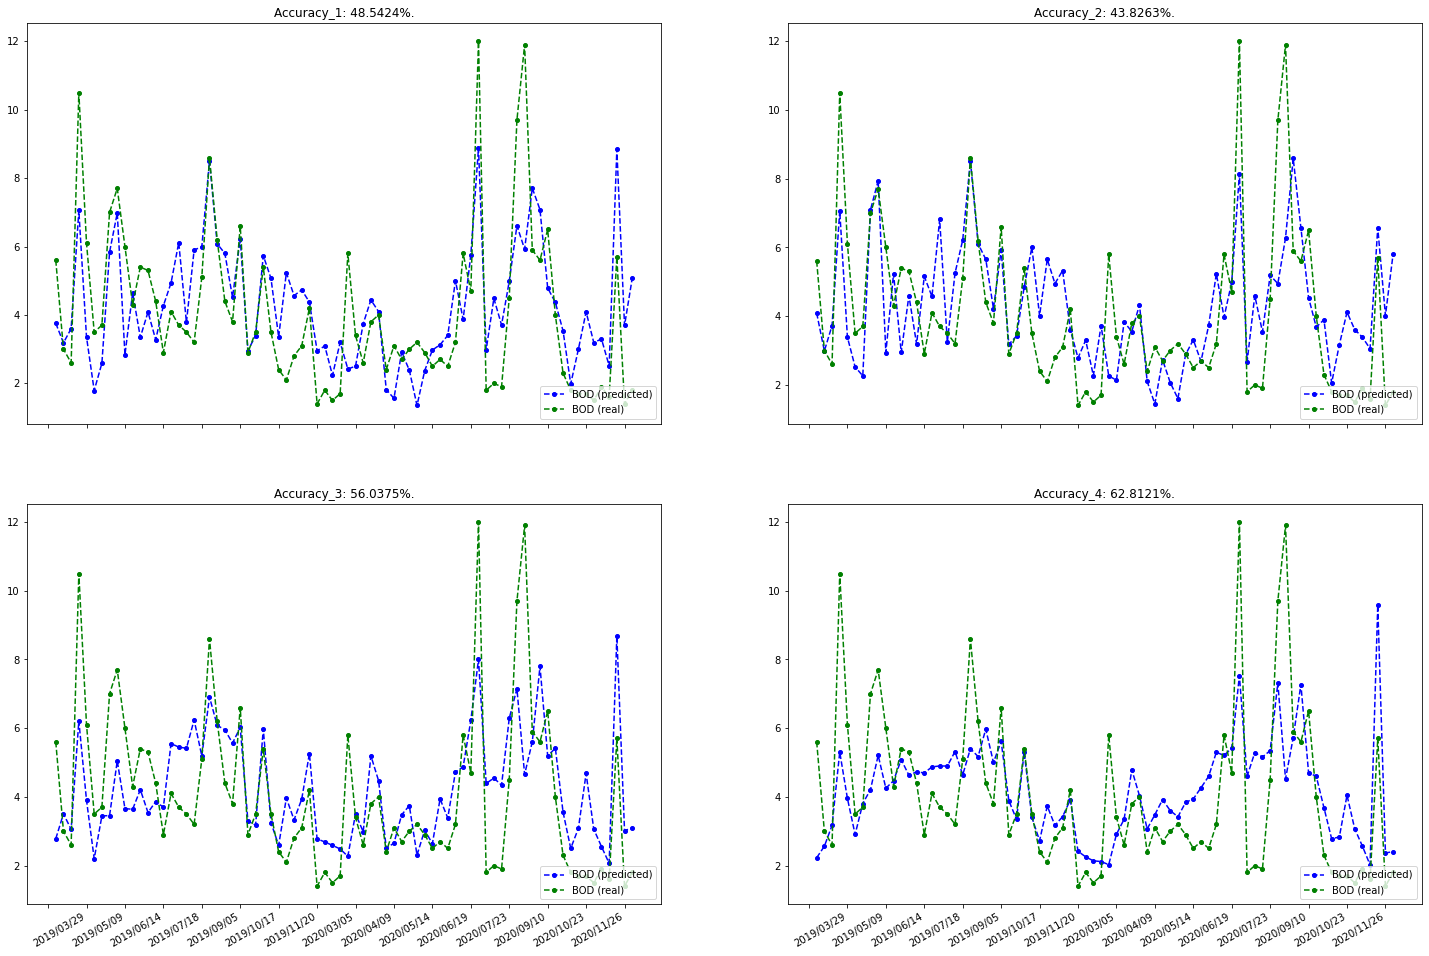

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.dates as dates

X_day       = jungnangcheon_df[['Temperature (°C)', 'Precipitation (mm)', 'Air Pressure (hPa)', 'Solar Radiation (MJ/m2)']]
X_previous  = jungnangcheon_df[['Temperature (°C) (previous Day)', 'Precipitation (mm) (previous Day)', 'Air Pressure (hPa) (previous Day)',                    'Solar Radiation (MJ/m2) (previous Day)']]
X_corr      = jungnangcheon_df[['Temperature (°C) (previous Day)', 'Precipitation (mm) (previous Day)', 'Air Pressure (hPa) (previous Day)']]
X_all       = [X, X_day, X_previous, X_corr]

i   = 0
fig = plt.figure(figsize=(8, 8))
ac = []
for x in X_all:
    # Build the model
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=2)
    linreg  = LinearRegression()
    linreg  .fit(X_train, y_train)
    # Evaluate the performance
    y_predict   = linreg.predict(X_test)
    errors      = abs(y_predict - y_test)        # Compute absolute errors
    mape        = 100 * (errors / y_test)
    accuracy    = 100 - np.mean(mape)
    accuracy_str= 'Accuracy_' + str(i+1) + ': ' + str(round(accuracy, 4)) + '%.'
    ac          .append(accuracy_str)
    print(accuracy_str)
    # Plot the predictions
    ax  = fig.add_subplot(2, 2, i+1)
    ax  .scatter(y_test, y_predict)
    ax  .set_ylim(0, 12)
    ax  .set_xlim(0, 12)
    plt .xlabel('True BOD, Dataset ' + str(i+1), weight='bold')
    plt .ylabel('Predicted BOD', weight='bold')
    i += 1
plt.savefig('images/linreg.png', dpi = 300)
plt.show()

# plot BOD-dates
fig2= plt.figure(figsize=(25, 18))
i = 0
for x in X_all:
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=2)
    linreg  = LinearRegression()
    linreg  .fit(X_train, y_train)
    y_predict_all = linreg.predict(x)
    bx  = fig2.add_subplot(2, 2, i+1)
    bx  .plot(date, y_predict_all, '--bo', label = 'BOD (predicted)', markersize=4)
    bx  .plot(date, y, '--go', label = 'BOD (real)', markersize=4)
    bx  .legend(loc="lower right")
    plt .title(ac[i])
    plt .gca().xaxis.set_major_locator(dates.DayLocator(interval=5))
    plt .gcf().autofmt_xdate()
    i += 1
plt.savefig('images/linreg_dates.png', dpi = 300)
plt.show()

## Decision Tree
#### Decision tree is a simple but powerful and easy to interpretate Machine learning algorithm. We will see the behaviour and decision making.

Accuracy of Decision Tree classifier on training set: 0.74
Accuracy of Decision Tree classifier on test set: 0.03


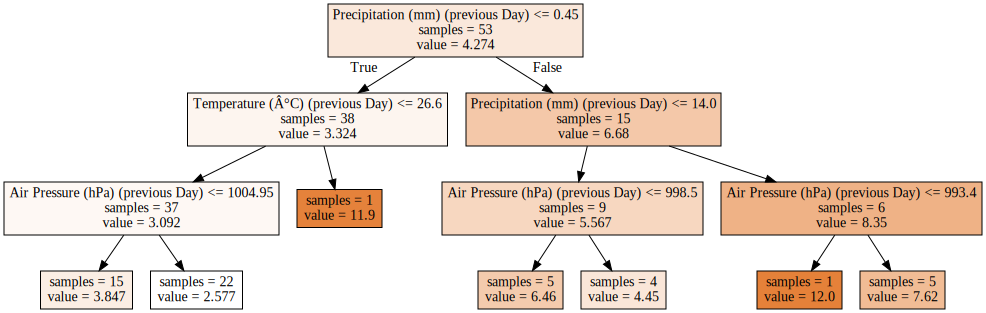

In [190]:
from sklearn.tree import DecisionTreeRegressor
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

tree = DecisionTreeRegressor(random_state=0, max_depth = 3).fit(X_train, y_train) # Add max depth to reduce overfitting
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(tree.score(X_test, y_test)))

plot_decision_tree(tree, X_corr.keys(), y.keys())

#### The decision tree model is too overfitted as we can see here. We could set max_depth=1 but it would only take Precipitation value to make the predictions.
#### This are the most used parameters:

Feature importances: [0.28623053 0.56472037 0.1490491 ]


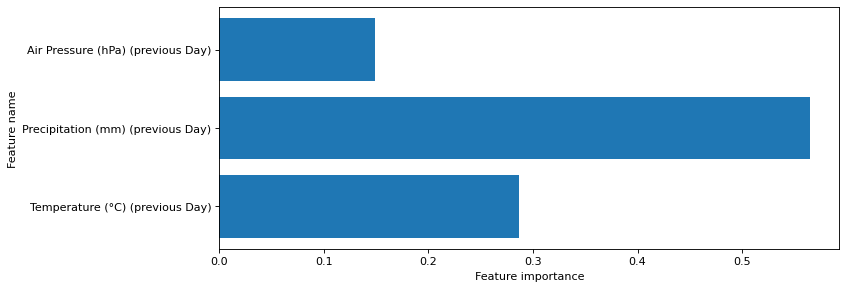

In [191]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(tree, X_corr.keys())

print('Feature importances: {}'.format(tree.feature_importances_))

# Random Forest
#### Takes multiple individual learning tree models and combines them to produce more powerful aggregate model.

Accuracy_1: 71.5041%.
Accuracy_2: 66.6785%.
Accuracy_3: 72.2594%.
Accuracy_4: 72.1231%.


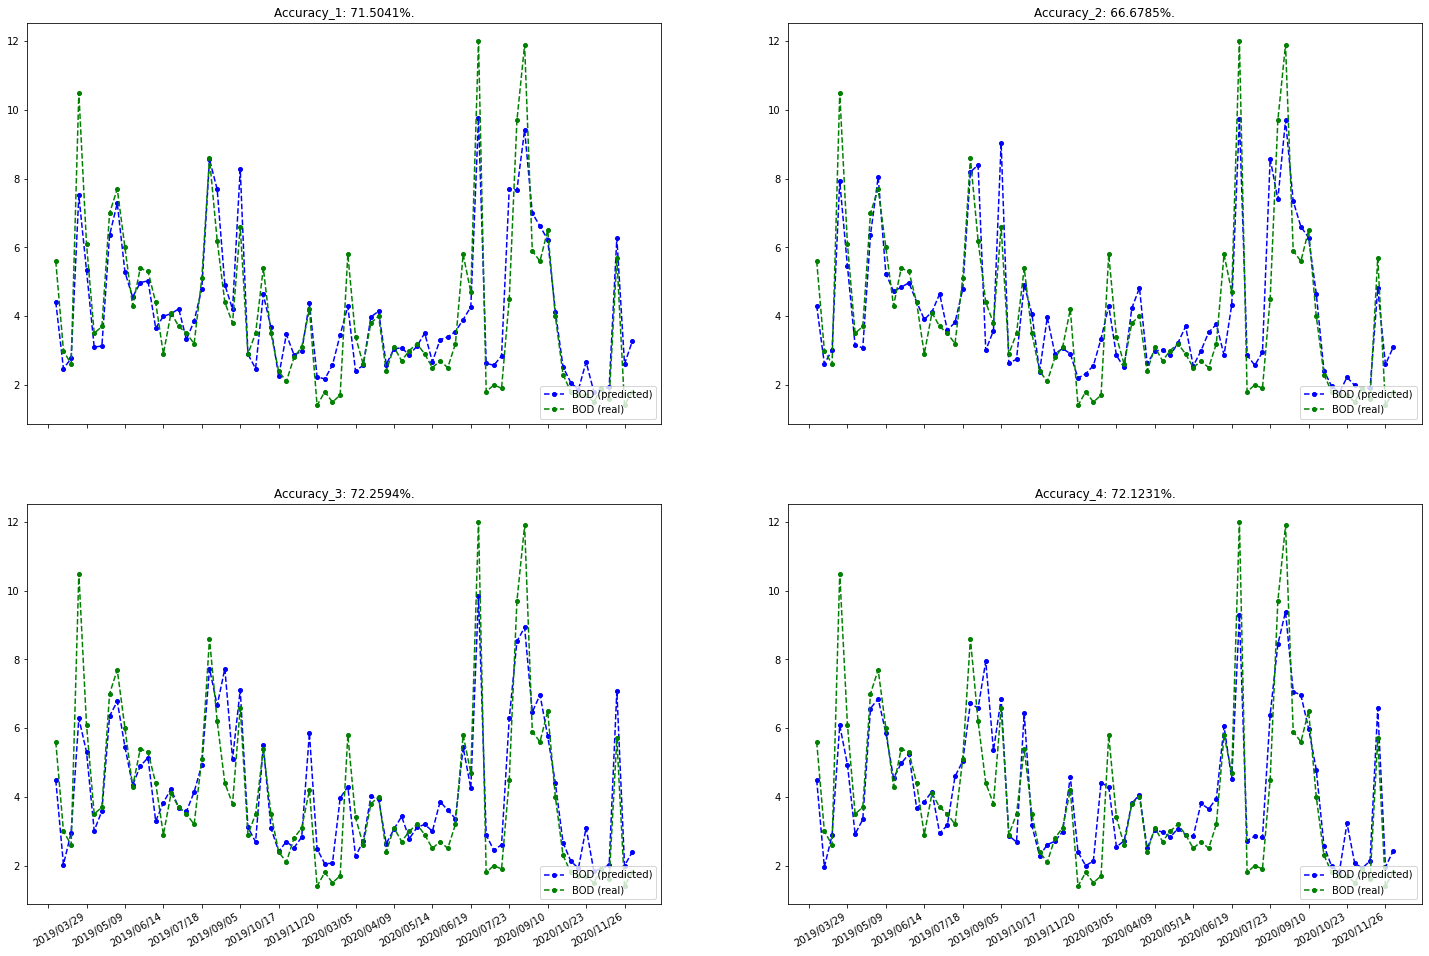

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

fig2= plt.figure(figsize=(25, 18))
i = 0
ac = []
for x in X_all:
    # Build model
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=101)
    forest = RandomForestRegressor(n_estimators=100, max_features=2, random_state=0).fit(X_train, y_train)
    y_predict = forest.predict(X_test) 

    # Evaluate the model
    errors = abs(y_predict - y_test)        # Compute absolute errors
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    accuracy_str= 'Accuracy_' + str(i+1) + ': ' + str(round(accuracy, 4)) + '%.'
    ac.append(accuracy_str)
    print(accuracy_str)

# Evaluate the performance
    errors      = abs(y_predict - y_test)        # Compute absolute errors
    mape        = 100 * (errors / y_test)
    accuracy    = 100 - np.mean(mape)

    # Predict everything
    y_predict_all = forest.predict(x)
    bx  = fig2.add_subplot(2, 2, i+1)
    bx  .plot(date, y_predict_all, '--bo', label = 'BOD (predicted)', markersize=4)
    bx  .plot(date, y, '--go', label = 'BOD (real)', markersize=4)
    bx  .legend(loc="lower right")
    plt .title(ac[i])
    plt .gca().xaxis.set_major_locator(dates.DayLocator(interval=5))
    plt .gcf().autofmt_xdate()
    i += 1
plt.savefig('images/forest.png', dpi = 300)
plt.show()



# Multilayer perceptron

Accuracy_1: 36.1055%.
Accuracy_2: 48.2778%.
Accuracy_3: 41.3039%.
Accuracy_4: 52.3964%.


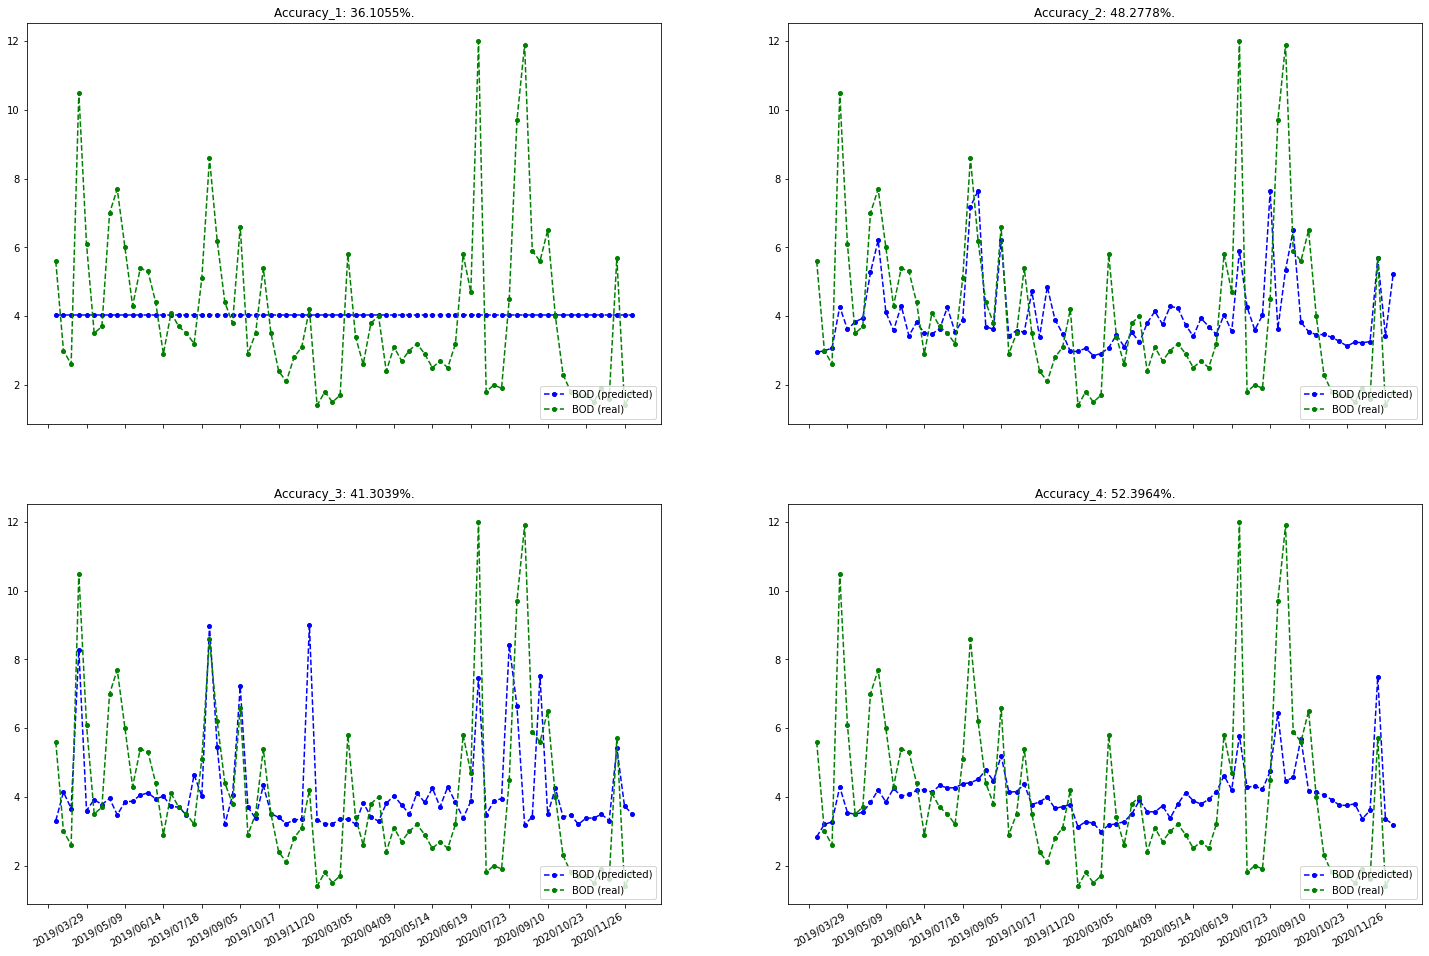

In [193]:
from sklearn.neural_network import MLPRegressor

fig3= plt.figure(figsize=(25, 18))
i   = 0
ac = []
for x in X_all:
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
    ann_sgd_model  = MLPRegressor(hidden_layer_sizes=(10, 10, 10),learning_rate_init=0.1, max_iter=1000, random_state=101, solver = 'lbfgs', activation = 'relu', learning_rate='constant')
    ann_sgd_model  .fit(X_train, y_train)
    
    y_predict = ann_sgd_model.predict(X_test)
    errors      = abs(y_predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    accuracy_str= 'Accuracy_' + str(i+1) + ': ' + str(round(accuracy, 4)) + '%.'
    ac.append(accuracy_str)
    print(accuracy_str)

    # plot models
    y_predict_all = ann_sgd_model.predict(x)
    bx  = fig3.add_subplot(2, 2, i+1)
    bx  .plot(date, y_predict_all, '--bo', label = 'BOD (predicted)', markersize=4)
    bx  .plot(date, y, '--go', label = 'BOD (real)', markersize=4)
    bx  .legend(loc="lower right")
    plt .title(ac[i])
    plt .gca().xaxis.set_major_locator(dates.DayLocator(interval=5))
    plt .gcf().autofmt_xdate()
    i += 1
plt.savefig('images/MLPRegressor.png', dpi = 300)
plt.show()